In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check the folder contents
os.listdir("/content/drive/MyDrive/archive (3)")

['Advertising.csv']

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/archive (3)/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#Understand the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##Data Cleaning & Preprocessing

In [ ]:
#Handle missing values
df = df.dropna()

In [ ]:
#Encode categorical columns (if any)
encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
#Identify Sales column
X = df.drop('Sales', axis=1)
y = df['Sales']

In [ ]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Train Model 1 – Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
#Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

Linear Regression Performance
MAE: 1.4650601050102927
RMSE: 1.788576100865966
R2 Score: 0.8986489151417081


##Train Model 2 – Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [ ]:
#Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)

Random Forest Performance
MAE: 0.6717499999999988
RMSE: 0.8242215721515658
R2 Score: 0.9784770642601495


In [ ]:
#Model Comparison Table
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison_df

,Model,MAE,RMSE,R2 Score
0,Linear Regression,1.46506,1.788576,0.898649
1,Random Forest,0.67175,0.824222,0.978477


##Visualization

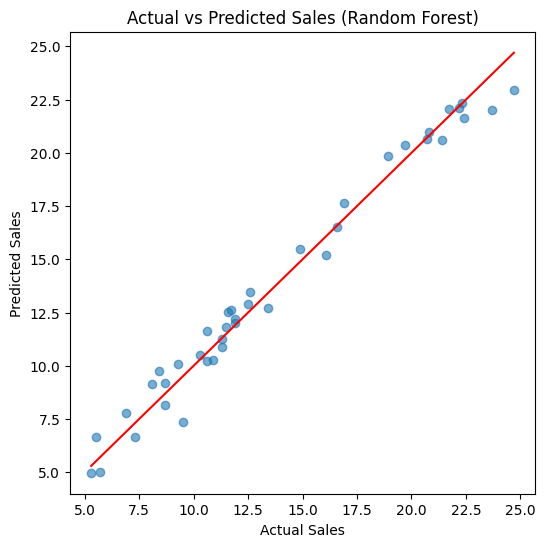

In [ ]:
#Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

In [ ]:
df.columns


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

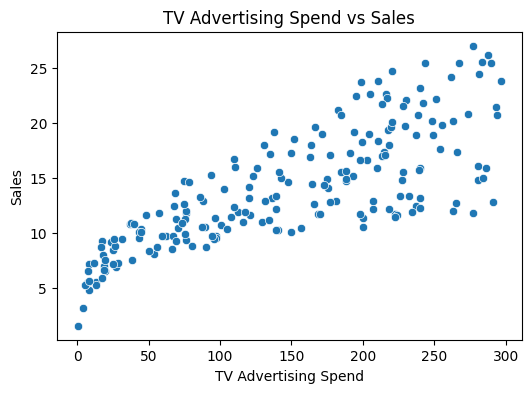

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title("TV Advertising Spend vs Sales")
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.show()

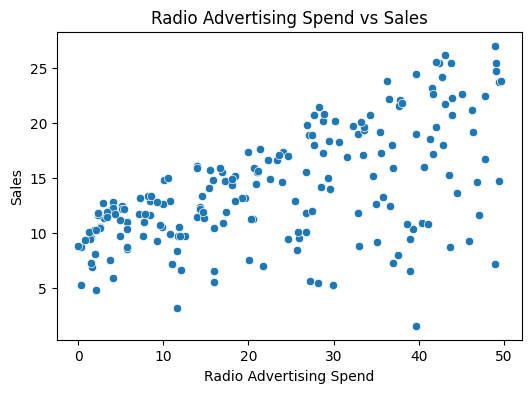

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title("Radio Advertising Spend vs Sales")
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.show()


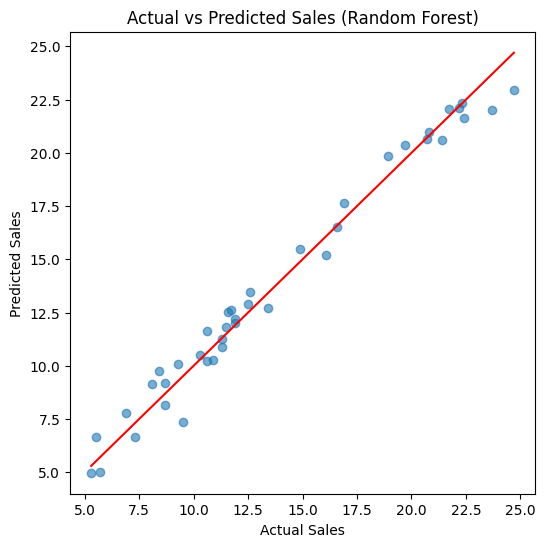

In [ ]:
#Actual vs Predicted for RANDOM FOREST
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

#SHAP

In [ ]:
!pip install shap

In [ ]:
# Use original (unscaled) training data for SHAP
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(rf, X_train_df)

# Compute SHAP values
shap_values = explainer(X_test_df)

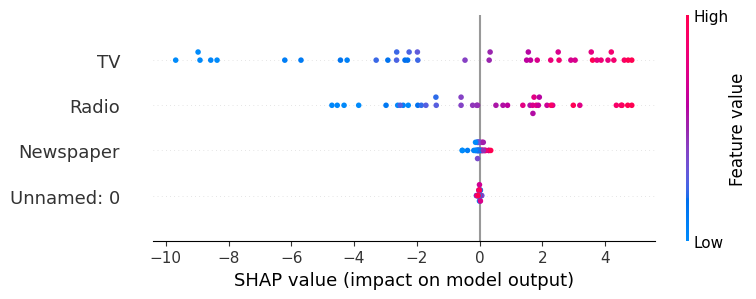

In [ ]:
shap.summary_plot(shap_values, X_test_df)

The Random Forest regression model was interpreted using **SHAP (SHapley Additive exPlanations)**.

According to the analysis, TV and radio advertising have the biggest effects on sales forecasts.

Transparency and confidence in the model's forecasts are enhanced as a result.